In [1]:
# importing libraries

import pandas as pd
import pandas
import numpy as np

In [2]:
# creating dataframe

dataset= pandas.read_csv("GOP_DATASET.csv",encoding='ISO-8859-1')

In [3]:
# Sample Dataset

dataset.head()

,candidate,candidate:confidence,relevant_yn,relevant_yn:confidence,sentiment,sentiment:confidence,subject_matter,subject_matter:confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,8/7/15 9:54,6.296970e+17,NaN,Quito
1,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,8/7/15 9:54,6.296970e+17,NaN,NaN
2,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,8/7/15 9:54,6.296970e+17,NaN,NaN
3,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,8/7/15 9:54,6.296970e+17,Texas,Central Time (US & Canada)
4,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,8/7/15 9:54,6.296970e+17,NaN,Arizona


In [4]:
# Dimensions of Dataset

dataset.shape

(13871, 20)

In [5]:
# Printing Columns in dataset

columns = list(dataset.columns.values)
print(columns)

['candidate', 'candidate:confidence', 'relevant_yn', 'relevant_yn:confidence', 'sentiment', 'sentiment:confidence', 'subject_matter', 'subject_matter:confidence', 'candidate_gold', 'name', 'relevant_yn_gold', 'retweet_count', 'sentiment_gold', 'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone']


In [6]:
# Dropping unwanted columns

dataset.drop(['candidate','candidate:confidence','relevant_yn',
              'relevant_yn:confidence','sentiment:confidence',
              'subject_matter','subject_matter:confidence',
              'candidate_gold','name','relevant_yn_gold',
              'retweet_count','sentiment_gold','subject_matter_gold',
              'tweet_coord','tweet_created','tweet_id',
              'tweet_location','user_timezone'],axis= 1,inplace= True)

In [7]:
# Dataset Sample after dropping

dataset.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [8]:
# Dataset Shape after Dropping

dataset.shape

(13871, 2)

In [9]:
# importing plotting library

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# Sentiment Count in the dataset

Sent_Count = dataset['sentiment'].value_counts()

print(Sent_Count)

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64


Text(0.5,1,'Count of Sentiment')

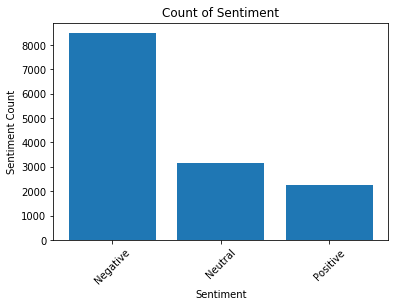

In [11]:
# Plotting Bar Graph

index = [1,2,3]
plt.bar(index,Sent_Count)
plt.xticks(index,['Negative','Neutral','Positive'],rotation=45)
plt.ylabel('Sentiment Count')
plt.xlabel('Sentiment')
plt.title("Count of Sentiment")

In [12]:
# importing dataset again for visualization

dataset_raw = pandas.read_csv("GOP_DATASET.csv",encoding='ISO-8859-1')

In [13]:
# Candidates Value Count

dataset_raw['candidate'].value_counts()

No candidate mentioned    7491
Donald Trump              2813
Jeb Bush                   705
Ted Cruz                   637
Ben Carson                 404
Mike Huckabee              393
Chris Christie             293
Marco Rubio                275
Rand Paul                  263
Scott Walker               259
John Kasich                242
Name: candidate, dtype: int64

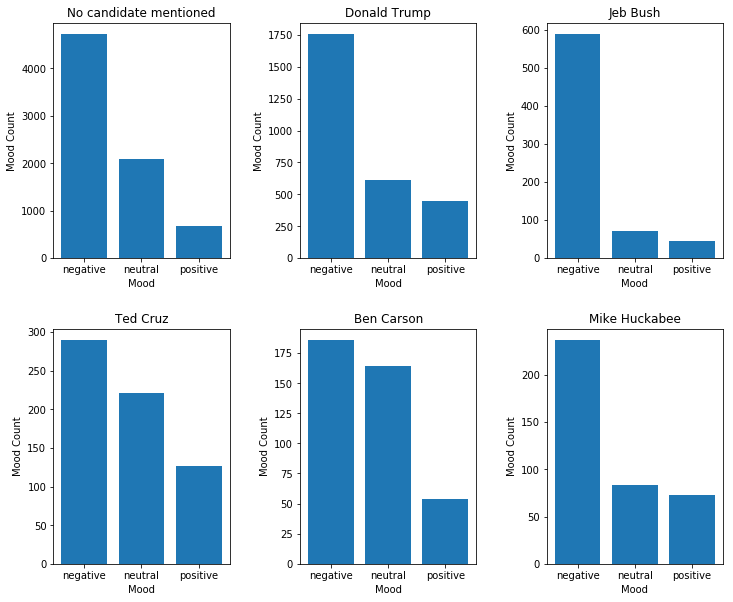

In [14]:
# Plotting Bar Graph of Candidates

def plot_sub_sentiment(GOP):
    df=dataset_raw[dataset_raw['candidate']==GOP]
    count=df['sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title(GOP)
plt.figure(1,figsize=(12, 12))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.4)
plt.subplot(331)
plot_sub_sentiment('No candidate mentioned')
plt.subplot(332)
plot_sub_sentiment('Donald Trump')
plt.subplot(333)
plot_sub_sentiment('Jeb Bush')
plt.subplot(334)
plot_sub_sentiment('Ted Cruz')
plt.subplot(335)
plot_sub_sentiment('Ben Carson')
plt.subplot(336)
plot_sub_sentiment('Mike Huckabee')

In [15]:
# Importing NLTK Library

import re
import nltk
from nltk.corpus import stopwords

In [16]:
# Dataset Cleaning - 1 

def processTweet(tweet):
    # process the tweets

    #Convert to lower case
    tweet = tweet.lower()
    #Convert www.* or https?://* to URL
    tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',tweet)
    #Convert @username to AT_USER
    tweet = re.sub('@[^\s]+','AT_USER',tweet)
    #Remove additional white spaces
    tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    #trim
    
    tweet = tweet.strip('\'"')
    return tweet

In [17]:
# Dataset Cleaning - 2

#start replaceTwoOrMore
def replaceTwoOrMore(s):
    #look for 2 or more repetitions of character and replace with the character itself
    pattern = re.compile(r"(.)\1{1,}", re.DOTALL)
    return pattern.sub(r"\1\1", s)
#end

In [18]:
# Dataset Cleaning - 3
# Removing Stop Words from Dataset

def getStopWordList(stopWordListFileName):
    #read the stopwords file and build a list
    stopWords = []
    stopWords.append('AT_USER')
    stopWords.append('URL')

    fp = open(stopWordListFileName, 'r')
    line = fp.readline()
    while line:
        word = line.strip()
        stopWords.append(word)
        line = fp.readline()
    fp.close()
    return stopWords

In [19]:
# Extracting features

def getFeatureVector(tweet):
    featureVector = []
    #split tweet into words
    words = tweet.split()
    for w in words:
        #replace two or more with two occurrences
        w = replaceTwoOrMore(w)
        #strip punctuation
        w = w.strip('\'"?,.')
        #check if the word stats with an alphabet
        val = re.search(r"^[a-zA-Z][a-zA-Z0-9]*$", w)
        #ignore if it is a stop word
        if(w in stopWords or val is None):
            continue
        else:
            featureVector.append(w.lower())
    return featureVector
#end

In [20]:

#start extract_features
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in featureList:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

In [21]:
# stop words file

st = open('stopwords.txt', 'r')


stopWords = getStopWordList('stopwords.txt')

In [22]:
# Sample tweet 

print(dataset['text'][5])


RT @GregAbbott_TX: @TedCruz: "On my first day I will rescind every illegal executive action taken by Barack Obama." #GOPDebate @FoxNews


In [23]:
# after preprocessing

processedTweet = processTweet(dataset['text'][5])
featureVector = getFeatureVector(processedTweet)
print(featureVector)

['rt', 'day', 'rescind', 'illegal', 'executive', 'action', 'barack', 'obama', 'gopdebate']


In [24]:
# Removing Neutral Sentiment

dataset = dataset[dataset.sentiment != "Neutral"]

In [25]:
# lowercase conversion

dataset['text'] = dataset['text'].apply(lambda x: x.lower())
dataset['text'] = dataset['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [26]:
# Sentiment Count

print(dataset[ dataset['sentiment'] == 'Positive'].size)
print(dataset[ dataset['sentiment'] == 'Negative'].size)

4472
16986


In [27]:
# Removing RT from tweets

for idx,row in dataset.iterrows():
    row[0] = row[0].replace('rt',' ')

In [28]:
# importing Deep Learning Libraries 

# from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
import re

Using TensorFlow backend.


In [29]:
dataset['text'][40] = 'It was great watching GOP Debate last night win win Game for trump'

In [30]:
test_tweet=dataset['text'][40]

In [31]:
# LSTM ALGORITHM

# Step-1

max_features = 2000
tokenizer = Tokenizer(nb_words=max_features, split=' ')
tokenizer.fit_on_texts(dataset['text'].values)
X = tokenizer.texts_to_sequences(dataset['text'].values)
XF = tokenizer.texts_to_sequences(dataset['text'].values)
X = pad_sequences(X)

/Users/sahilarora/anaconda/lib/python3.6/site-packages/keras/preprocessing/text.py:139: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [32]:
XF

[[3,
  360,
  121,
  1,
  694,
  2,
  40,
  59,
  235,
  38,
  208,
  7,
  173,
  1747,
  14,
  1310,
  1394,
  735],
 [3, 17, 282, 250, 6, 811, 103, 171, 27, 135, 7, 1, 172, 14, 2, 232, 715, 18],
 [3, 1248, 2, 301, 24, 1929, 1, 1616, 214, 14, 1, 695, 7, 184, 205, 367, 680],
 [3,
  126,
  18,
  54,
  262,
  405,
  10,
  83,
  302,
  435,
  1311,
  1748,
  1134,
  63,
  1930,
  192,
  2,
  52],
 [3,
  10,
  1135,
  171,
  9,
  22,
  1312,
  64,
  10,
  607,
  186,
  22,
  187,
  5,
  35,
  1,
  557,
  20,
  812,
  2,
  45,
  736],
 [14, 1, 3, 166, 97, 541, 35, 1, 104, 582, 53, 60, 1749, 8, 18, 608, 2],
 [3, 40, 147, 27, 813, 13, 2, 913],
 [24, 14, 47, 17],
 [3, 37, 1931, 48, 5, 849, 21, 70, 2, 173, 542, 7, 1, 59, 274, 333],
 [32, 1192, 54, 447, 23, 55, 142, 1, 2, 22],
 [3, 661, 10, 510, 303, 167, 56, 14, 1313, 181, 13, 48, 2],
 [304, 368, 1, 7, 881, 15, 93, 461, 269, 6, 270, 2],
 [3, 265, 462, 953, 15, 447, 23, 108, 14, 18, 2, 469],
 [3, 609, 53, 185, 131, 174, 109, 30, 1, 2, 52, 276, 4

In [33]:
X[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  17, 282,
       250,   6, 811, 103, 171,  27, 135,   7,   1, 172,  14,   2, 232,
       715,  18], dtype=int32)

In [34]:
print(dataset["text"][40])
print(type(X[40]))
print(XF[40])
print(len(XF[40]))
print(X[40])
print(len(X[40]))

It was great watching GOP Debate last night win win Game for trump
<class 'numpy.ndarray'>
[3, 647, 8, 105, 84, 14, 1, 348, 38, 108, 25, 112, 1094, 191, 14, 21, 27, 379, 13, 82, 20, 1137, 2]
23
[   0    0    0    0    0    3  647    8  105   84   14    1  348   38  108
   25  112 1094  191   14   21   27  379   13   82   20 1137    2]
28


In [35]:
# LSTM - Step 2

embed_dim =128
lstm_out =196

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1], dropout=0.2))
model.add(LSTM(lstm_out, dropout_U=0.2, dropout_W=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

/Users/sahilarora/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  import sys
/Users/sahilarora/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(196, dropout=0.2, recurrent_dropout=0.2)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 28, 128)           256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 394       
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
## LSTM Step -3 Go to Algorithm.py script

In [37]:
# LSTM Step - 4 - Train Test Split

Y = pd.get_dummies(dataset['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7188, 28) (7188, 2)
(3541, 28) (3541, 2)


In [38]:
# Traing the Model  -  EPOCH - 5

batch_size = 32
model.fit(X_train, Y_train, epochs = 5, batch_size=batch_size, verbose = 2)

Epoch 1/5
51s - loss: 0.4257 - acc: 0.8230
Epoch 2/5
57s - loss: 0.3059 - acc: 0.8716
Epoch 3/5
58s - loss: 0.2642 - acc: 0.8902
Epoch 4/5
54s - loss: 0.2286 - acc: 0.9041
Epoch 5/5
57s - loss: 0.1963 - acc: 0.9232


In [40]:
# Training Model - EPOCH - 25 (Total 30)

batch_size = 32
model.fit(X_train, Y_train, epochs = 25, batch_size=batch_size, verbose = 2)

Epoch 1/25
47s - loss: 0.1634 - acc: 0.9348
Epoch 2/25
48s - loss: 0.1462 - acc: 0.9392
Epoch 3/25
49s - loss: 0.1320 - acc: 0.9446
Epoch 4/25
52s - loss: 0.1176 - acc: 0.9501
Epoch 5/25
46s - loss: 0.1053 - acc: 0.9566
Epoch 6/25
48s - loss: 0.1001 - acc: 0.9594
Epoch 7/25
42s - loss: 0.0985 - acc: 0.9597
Epoch 8/25
42s - loss: 0.0884 - acc: 0.9631
Epoch 9/25
42s - loss: 0.0882 - acc: 0.9637
Epoch 10/25
42s - loss: 0.0838 - acc: 0.9656
Epoch 11/25
42s - loss: 0.0788 - acc: 0.9683
Epoch 12/25
41s - loss: 0.0837 - acc: 0.9654
Epoch 13/25
41s - loss: 0.0791 - acc: 0.9669
Epoch 14/25
42s - loss: 0.0736 - acc: 0.9680
Epoch 15/25
42s - loss: 0.0701 - acc: 0.9705
Epoch 16/25
42s - loss: 0.0710 - acc: 0.9720
Epoch 17/25
42s - loss: 0.0711 - acc: 0.9711
Epoch 18/25
41s - loss: 0.0658 - acc: 0.9726
Epoch 19/25
42s - loss: 0.0624 - acc: 0.9722
Epoch 20/25
42s - loss: 0.0657 - acc: 0.9715
Epoch 21/25
43s - loss: 0.0694 - acc: 0.9702
Epoch 22/25
42s - loss: 0.0669 - acc: 0.9715
Epoch 23/25
42s - l

In [40]:
# importing library
from keras.models import model_from_json

In [41]:
# Saving Keras Model

# serialize model to JSON
model_json = model.to_json()
with open("model_lstm.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_lstm.h5")
print("Saved model to disk")

# later...



Saved model to disk


In [ ]:
# scores = model.evaluate(X_test, Y_test, verbose=0)
# print("Accuracy: %.2f%%" % (scores[1]*100))

In [39]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
# print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

acc: 0.85


In [43]:
pos_cnt, neg_cnt, pos_correct, neg_correct = 0, 0, 0, 0
for x in range(len(X_validate)):
    
    result = model.predict(X_validate[x].reshape(1,X_test.shape[1]),batch_size=1,verbose = 2)[0]
   
    if np.argmax(result) == np.argmax(Y_validate[x]):
        if np.argmax(Y_validate[x]) == 0:
            neg_correct += 1
        else:
            pos_correct += 1
       
    if np.argmax(Y_validate[x]) == 0:
        neg_cnt += 1
    else:
        pos_cnt += 1



print("pos_acc", pos_correct/pos_cnt*100, "%")
print("neg_acc", neg_correct/neg_cnt*100, "%")

pos_acc 40.41095890410959 %
neg_acc 96.44039735099338 %


In [22]:
# TESTING ON UNLABELED DATA

In [105]:
rows = []
columns = ['text']
rows.append('This movie is not too good')
df = pd.DataFrame(rows,columns=columns)

In [106]:
df.head()

,text
0,This movie is not too good


In [107]:
df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

In [108]:
for idx,row in df.iterrows():
    row[0] = row[0].replace('rt',' ')
    
df.head()

,text
0,this movie is not too good


In [109]:
## BREAK 1 START

In [110]:
X2 = tokenizer.texts_to_sequences(df['text'].values)
XF2 = tokenizer.texts_to_sequences(df['text'].values)
X2 = pad_sequences(X2)
tweet  = df['text'][0]


In [111]:
XF2

[[21, 1018, 6, 20, 259, 137]]

In [112]:
X3 = pad_sequences(X2,28)

In [113]:
X3

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          21, 1018,    6,   20,  259,  137]], dtype=int32)

In [114]:
# load json and create model
json_file = open('model_lstm.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
model = model_from_json(loaded_model_json)
tweet = df['text'][0]

X3=tweet
# load weights into new model
model.load_weights("model_lstm.h5")
print("Loaded model from disk")

Loaded model from disk


In [80]:
# TWITTER API Library
from tweepy.api import API

In [81]:
# User Access keys

consumer_key = ''
consumer_secret = ''

access_token = ''
access_token_secret = ''

In [82]:
## Tweet Classification Class

class SentimentAnalyzer():
    
    def __init__(self):
        pass
    
    def clean_tweet(self, tweet):
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    
    def analyze_tweet_sentiment(self,tweet):
        
        
        sentiment = model.predict(tweet)
            
        return polarity,sentiment
    
    def analyze_all_tweet_sentiment(self, tweet_file):
        
        twitter_sentiment_list = []
        with open(tweet_file,'r') as tf:
            for tweet in tf:
                sentiment = self.analyze_tweet_sentiment(tweet)
                twitter_sentiment_list.append(sentiment)                
        return twitter_sentiment_list

In [83]:
# Twitter Streaming Class


class TwitterStreamer():
    
    """
    Class for streaming and processing live tweets.
    """

    
    def __init__(self):
        pass


    def stream_tweets(self, fetched_tweets_filename, hash_tag_list):
        #This handles Twitter authetification and the connection to Twitter Streaming API
        l = StdOutListener(fetched_tweets_filename)
        auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
        auth.set_access_token(access_token,access_token_secret)
#         auth = OAuthHandler(config.TWITTER_CONSUMER_KEY, config.TWITTER_CONSUMER_SECRET)
#         auth.set_access_token(config.TWITTER_ACCESS_TOKEN, config.TWITTER_ACCESS_TOKEN_SECRET)
        stream = Stream(auth, l)
        
        

        #This line filter Twitter Streams to capture data by the keywords: 
        stream.filter(track=hash_tag_list,languages =['en'])

In [84]:
# Importing Libraries

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream
import tweepy
import re
import string
from tweepy.api import API



In [ ]:
# Twitter Final Class

class StdOutListener(StreamListener):
    """
    This is a basic listener that just prints received tweets to stdout.
    """

    def __init__(self, fetched_tweets_filename,api=None):
        self.fetched_tweets_filename = fetched_tweets_filename
        self.sa = SentimentAnalyzer()
        self.api=api or API()


    def on_status(self, data):
#         tweet = data.split(',"text":"')[1].split('","source')[0]

        tweet = data.text
    
        
        if not tweet.startswith('RT'):
            
            polarity, magnitude = self.sa.analyze_tweet_sentiment(tweet)
            tweet_and_sentiment = tweet +',' + " POLARITY::" + str(polarity) + "," + \
                                  " SENTIMENT::" + str(magnitude) + ' ###_END_OF_TWEET_###' +'\n'             
            print(tweet_and_sentiment)
            print("\n")
            
            with open(fetched_tweets_filename,'a') as tf:
                
                tf.write(tweet_and_sentiment)
                
            
            with open(polarity_file,'a') as pt:
                
                plot_point = str(polarity)+'\n'
                pt.write(plot_point)
                
            
        return True
    
    def on_error(self, status):
        print("Connection Error",status)
        
        
if __name__ == '__main__':
    
    
    
    listT = []
    k=True
    while k:
        
        ans = input("Enter Keywords: ")
        listT.append(ans)
        ans2 = input("Want to Add More Keywords y/n: ")
        if ans2=='y':
            continue
        else:
            print("###########################____FETCHING TWEETS____##################################")
            k=False
        
    
    
    hash_tag_list = listT
    fetched_tweets_filename = "stream_tweets3.txt"
    polarity_file = "polarity_tweets.txt"
    z = 1


    ts = TwitterStreamer()
    ts.stream_tweets(fetched_tweets_filename, hash_tag_list)
    


In [194]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [195]:
# Computing tweets

with open("tweets_12.txt") as f:
    contents = f.read()
    count_pos = sum(1 for x in re.finditer(r"\b"+re.escape('positive')+ r"\b", contents))
    count_neg = sum(1 for x in re.finditer(r"\b"+re.escape('negative')+ r"\b", contents))
    count_neut = sum(1 for x in re.finditer(r"\b"+re.escape('neutral')+ r"\b", contents))

print("Count Positive:",count_pos)
print("Count Negative:",count_neg)
print("Count Neautral:",count_neut)

total = count_pos+count_neg+count_neut

p_pos = float(count_pos/total)*100.00
p_neg = float(count_neg/total)*100.00
p_nea = float(count_neut/total)*100.00

print("Count Positive %:",int(p_pos),'%')
print("Count Negative %:",int(p_neg),'%')
print("Count Neautral %:",int(p_nea),'%')

Count Positive: 29
Count Negative: 17
Count Neautral: 54
Count Positive %: 28 %
Count Negative %: 17 %
Count Neautral %: 54 %


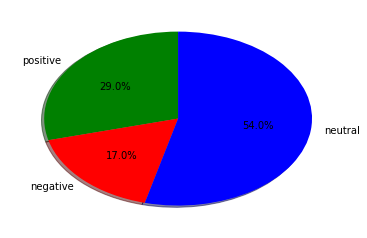

In [196]:
# Pie Chart Description

import matplotlib.pyplot as plt

senti_plot = [p_pos,p_neg,p_nea]
activities = ['positive','negative','neutral']
cols = ['g','r','b']

plt.pie(senti_plot,
        labels=activities,
        colors=cols,
        shadow=True,
        startangle=90,
        autopct='%1.1f%%')

plt.show()